# Lab 3 - Twin and control

In this lab we will learn an model of the pendulum either with your own data or for now artificial data. 
You will need the implementation of the motor class from lab 1 in this lab.

The following things will be done in this lab:

* Learn a model of a the pendulum with curve fitting an Neural network
* Experiment with the amount and values of data 
  
    The control problem is split up in 2 parts: swing up and balance.  
    For the swing up control part:   
     
     
* Implement the motor class and evaluate the best first motor action
* Sequentially do this for every new state of the pendulum until the angle is pi radius
     
    For the balance part:  
         
         
* Implement and experiment with PID control
* Evaluate the movement of pivot point (what is the range)


In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from sklearn.neural_network import MLPRegressor
import math
from sklearn.metrics import mean_squared_error
from matplotlib.patches import Rectangle

In [2]:
#our estimaded function
def model(X, mu, L, g):
    theta, theta_dot = X
    return -mu * theta_dot - (g/L) * np.sin(theta)

In [3]:
# change these parameters to more realistic values
mu = 0.3
L = 3
g = 9.8

In [4]:
# To make use of scipy.optimize curve_fit this is the form we should present the model
# watch https://www.youtube.com/watch?v=tl5QNhSe0Yk to fresh up your knowledge on curve fitting
def model(X, mu, L, g):
    theta, theta_dot = X
    result = [-mu*theta_dot[i] - (g/L)*(math.sin(theta[i])) for i in range(len(theta))]
    return result

# ''' return the angular acceleration of the pendulum theta is the angle, thata dot the angular velocity''' 
# (g/L should be in brackets)

If you make use of your own created data from the pendulum,  
you will need to calculate the angular speed so that you will have both state parameters.  
Here we will create some noisy data: that we can use for curve fitting.

In [5]:
# Some artificially noisy data to fit, x and y are theta and theta_dot and z is the model output with some noise. 
# z is theta_double_dot.
# change the g_range to give the data generation a broader scope of values. Experiment with the effect.

g_range = 1.
data_size = 101

x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) / 10 # theta_double_dot with some noise
print(len(x))
print(len(z))
print(z[:100])


101
101
[ 0.39261361  0.58538436  0.74485698  0.9852123   1.16726334  1.34156245
  1.55290115  1.71336089  1.85582471  2.040694    2.24049464  2.37332544
  2.54941034  2.64531221  2.7904037   2.88026373  3.00477642  3.11654713
  3.22085833  3.22513288  3.28714486  3.36267646  3.41930558  3.45391766
  3.45874101  3.46498816  3.41403749  3.47058599  3.34964831  3.34635779
  3.22858148  3.21332582  3.06886313  2.98134496  2.89815902  2.76837092
  2.64285013  2.47906894  2.3996763   2.17430171  1.9927186   1.90233671
  1.66718175  1.4993286   1.33803211  1.08999137  0.89115578  0.64806846
  0.44371052  0.27853153  0.01384623 -0.17336336 -0.36503047 -0.61670371
 -0.81274234 -0.97874574 -1.15930706 -1.34563708 -1.53338325 -1.78480488
 -1.93081249 -2.09717446 -2.20961774 -2.42521086 -2.56326995 -2.72439459
 -2.78407393 -2.93285882 -2.98397434 -3.14773474 -3.21450257 -3.26956722
 -3.32540097 -3.36340149 -3.36787242 -3.3289763  -3.40981503 -3.34517246
 -3.32813726 -3.27672941 -3.26511078 -3.217

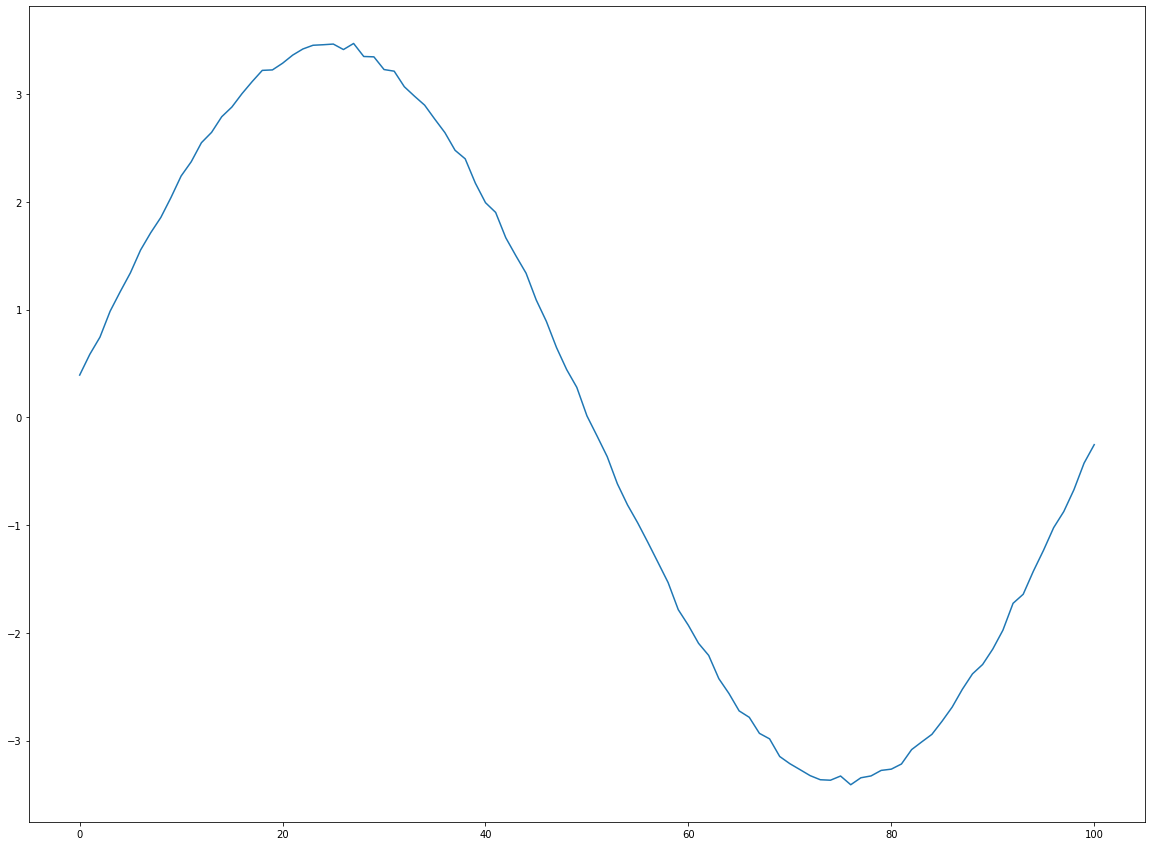

In [6]:
plt.figure(figsize=(20,15))
plt.plot(z)

In [7]:
#these are your initialization values of the model parameters (mu, L, g)
p0 = 2.5, 2., 9.8
#fit function with some initial parameters for mu, L and g
f = curve_fit(model, (x,y), z, p0)
print(f[0]) # mu, L, g
print('g/L:', f[0][2]/f[0][1])

[3.17112689e-01 2.67045328e+02 8.69778752e+02]
g/L: 3.2570453754025253


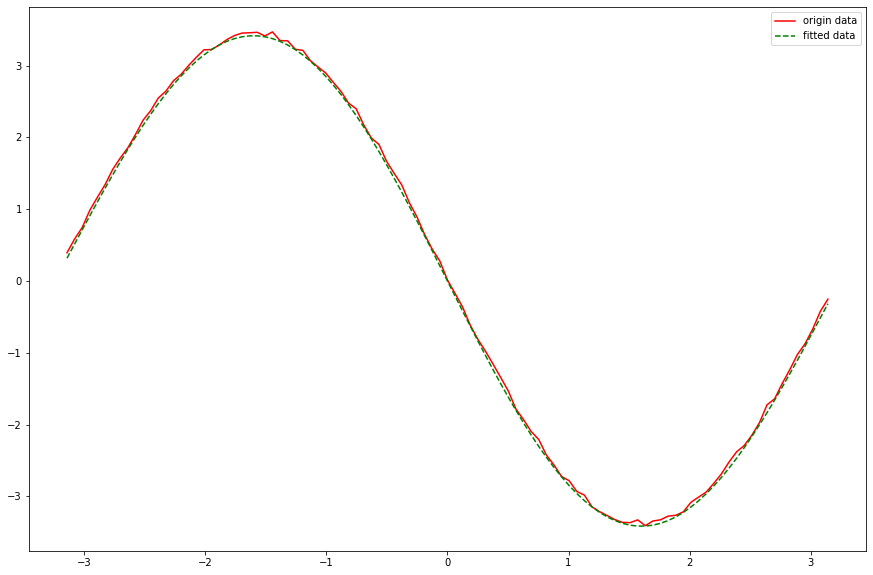

In [8]:
plt.figure(figsize=(15,10))
plt.plot(x,z,'r-',label='origin data')
plt.plot(x,model((x,y), *f[0]), 'g--', label='fitted data')
plt.legend()
plt.show()

**Question [5 points]:** Plot different learned model parameters by increasing the amount of data. Explain what you see. Wich parameter can we fit and wich one not? come up with an explanaition. For every combination of learned g and L calculate the ratio. 

[  0.30385836  53.19463293 173.71908375]


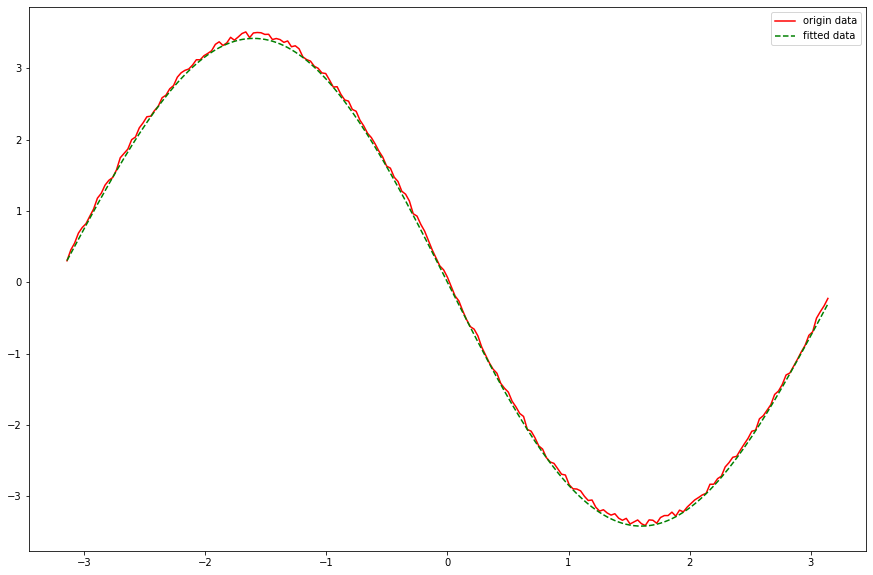

g/L: 3.2657257732421647


In [9]:
g_range = 1.
data_size = 201

x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) / 10 # theta_double_dot with some noise

#these are your initialization values of the model parameters (mu, L, g)
p0 = 2.5, 2., 9.8
#fit function with some initial parameters for mu, L and g
f = curve_fit(model, (x,y), z, p0)
print(f[0])

plt.figure(figsize=(15,10))
plt.plot(x,z,'r-',label='origin data')
plt.plot(x,model((x,y), *f[0]), 'g--', label='fitted data')
plt.legend()
plt.show()

print('g/L:',f[0][2]/f[0][1])

[3.01160151e-01 8.54717127e+03 2.79409141e+04]


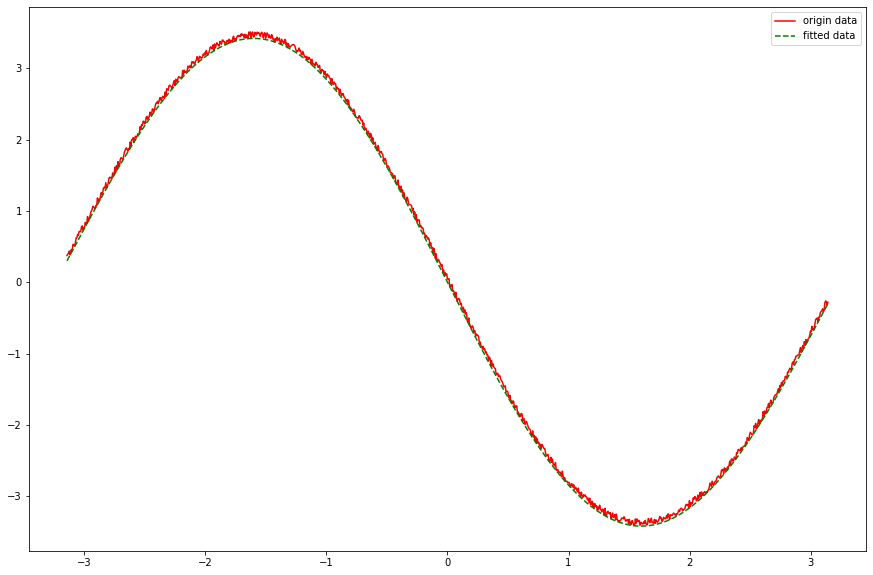

g/L: 3.2690247134871617


In [10]:
g_range = 1.
data_size = 1001

x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) / 10 # theta_double_dot with some noise

#these are your initialization values of the model parameters (mu, L, g)
p0 = 2.5, 2., 9.8
#fit function with some initial parameters for mu, L and g
f = curve_fit(model, (x,y), z, p0)
print(f[0])

plt.figure(figsize=(15,10))
plt.plot(x,z,'r-',label='origin data')
plt.plot(x,model((x,y), *f[0]), 'g--', label='fitted data')
plt.legend()
plt.show()

print('g/L:',f[0][2]/f[0][1])

**Question [5 points]:** Randomly initialize p0 200 times and apply the curve_fit.  
Explain the results and plot the parameters as below.  

In [11]:
g_range = 1.
data_size = 200

x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) / 10 # theta_double_dot with some noise

#these are your initialization values of the model parameters (mu, L, g)
f = []
for i in range(200):
    p0 = np.random.random(), 2., 9.8
    f.append(curve_fit(model, (x,y), z, p0))
#fit function with some initial parameters for mu, L and g


    
print(f)

# plt.figure(figsize=(15,10))
# plt.plot(x,z,'r-',label='origin data')
# plt.plot(x,model((x,y), *f[0]), 'g--', label='fitted data')
# plt.legend()
# plt.show()

# print('g/L:',f[0][2]/f[0][1])

[(array([3.00920830e-01, 1.11635422e+02, 3.64932712e+02]), array([[ 1.17471313e-04, -8.23502939e+03, -2.69200939e+04],
       [-8.23502834e+03,  4.23558442e+14,  1.38460102e+15],
       [-2.69200887e+04,  1.38460102e+15,  4.52622307e+15]])), (array([3.00920829e-01, 1.52150626e+03, 4.97375134e+03]), array([[ 1.17113272e-04,  6.03501714e+04,  1.97282233e+05],
       [ 6.03501565e+04, -1.84010933e+16, -6.01524418e+16],
       [ 1.97282202e+05, -6.01524418e+16, -1.96635939e+17]])), (array([3.00920831e-01, 2.13202801e+02, 6.96953165e+02]), array([[ 1.17311524e-04, -4.65528769e+02, -1.52181666e+03],
       [-4.65530525e+02,  6.79072494e+14,  2.21986557e+15],
       [-1.52182651e+03,  2.21986557e+15,  7.25666726e+15]])), (array([3.00920833e-01, 1.07972475e+03, 3.52958780e+03]), array([[ 1.17071537e-04, -6.74559253e+04, -2.20511671e+05],
       [-6.74559183e+04, -1.89857735e+16, -6.20639871e+16],
       [-2.20511617e+05, -6.20639871e+16, -2.02885519e+17]])), (array([3.00920832e-01, 1.37756814e

In [12]:
for i in range(len(f)):
    print(i)
    print('g/L:', f[i][0][2] / f[i][0][1])
    print('  ')

0
g/L: 3.2689688129442773
  
1
g/L: 3.268965408333847
  
2
g/L: 3.2689681452580386
  
3
g/L: 3.268969987608303
  
4
g/L: 3.2689664151449396
  
5
g/L: 3.268967187027581
  
6
g/L: 3.2689683754555623
  
7
g/L: 3.268966218642914
  
8
g/L: 3.268967533146266
  
9
g/L: 3.268968394542307
  
10
g/L: 3.2689665782323907
  
11
g/L: 3.26896860757756
  
12
g/L: 3.2689677800746706
  
13
g/L: 3.268970387613732
  
14
g/L: 3.268967164639447
  
15
g/L: 3.2689662322012083
  
16
g/L: 3.26896788961693
  
17
g/L: 3.268966545253374
  
18
g/L: 3.2689677429871256
  
19
g/L: 3.268969113372536
  
20
g/L: 3.2689667991938625
  
21
g/L: 3.268967594494636
  
22
g/L: 3.2689685931253174
  
23
g/L: 3.268970614592292
  
24
g/L: 3.268968279828243
  
25
g/L: 3.268969575230981
  
26
g/L: 3.268968623678876
  
27
g/L: 3.26896653381721
  
28
g/L: 3.268967697976027
  
29
g/L: 3.2689673176146883
  
30
g/L: 3.2689691647039174
  
31
g/L: 3.268968532171463
  
32
g/L: 3.26896823908965
  
33
g/L: 3.2689690915930636
  
34
g/L: 3.26896

In [13]:
p0_mu = [(f[i][0][0]) for i in range(200)]
p0_g = [f[i][0][2] for i in range(200)]
p0_L = [f[i][0][1] for i in range(200)]

p0_g = np.asarray(p0_g)
p0_L = np.asarray(p0_L)

(array([ 1.,  0.,  1.,  0.,  0.,  3.,  9., 14., 25., 45., 46., 28., 14.,
         6.,  3.,  2.,  0.,  1.,  0.,  2.]),
 array([3.26896083, 3.26896154, 3.26896225, 3.26896295, 3.26896366,
        3.26896436, 3.26896507, 3.26896577, 3.26896648, 3.26896718,
        3.26896789, 3.2689686 , 3.2689693 , 3.26897001, 3.26897071,
        3.26897142, 3.26897212, 3.26897283, 3.26897353, 3.26897424,
        3.26897495]),
 <a list of 20 Patch objects>)

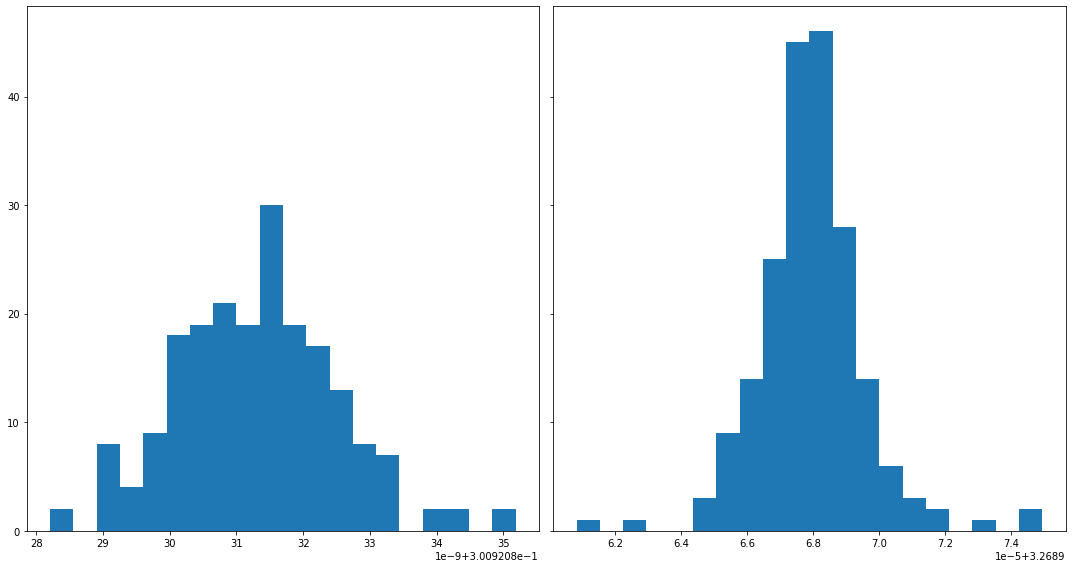

In [14]:
# Show histogram of values from randomly learning 
n_bins = 20
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(15,8))
axs[0].hist(p0_mu, bins=n_bins)
axs[1].hist(p0_g/p0_L, bins=n_bins)

Now we are going to train a neural network to learn the model. 
**Question [5 points]:** Experiment with the model hidden_layer_sizes and evaluate the predictions to the actual values using least_squered_error. What is the best model that you found? Also experiment with the alpha > this is a so called regularization term that penalizes large parameter values in the model. check out sklearn for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [54]:
g_range = 2.
data_size = 200

# same model as above
def model(theta, theta_dot, mu, L, g): 
    result = -mu*theta_dot - (g/L)*(math.sin(theta)) 
    return result

xs = np.linspace(-g_range*np.pi,g_range*np.pi,data_size) # theta
ys = np.linspace(-g_range, g_range, data_size)  # theta_dot
z = []
X = []
for x in xs:
    for y in ys:
        z.append(model(x, y, mu, L, g) * 1 + np.random.random() / 10) # theta_double_dot with some noise
        X.append((x, y))
z = np.asarray(z)
Y = z # theta_double_dot
# X is (theta, theta_dot)
# Y is theta_double_dot

In [37]:

alpha_list = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
h_l_1_list = [4, 5, 6, 7, 8]
h_l_2_list = [4, 5, 6, 7, 8]
smallest_mse = 100
for alpha_value in alpha_list:
    for h_l_1 in h_l_1_list:
        for h_l_2 in h_l_2_list:
            
            clf = MLPRegressor(solver='lbfgs', alpha=alpha_value, hidden_layer_sizes=(h_l_1, h_l_2), random_state=1, max_iter=10000)
            clf.fit(X, Y)
            y_predict = clf.predict(X)
            mse = mean_squared_error(Y, y_predict)
            print(alpha_value, h_l_1, h_l_2, mse)
            if mse < smallest_mse:
                best_alpha = alpha_value
                best_h_l_1 = h_l_1
                best_h_l_2 = h_l_2
                smallest_mse = mse
                
print(best_alpha, best_h_l_1, best_h_l_2, smallest_mse)

1e-05 4 4 0.821092339513212
1e-05 4 5 0.02682228640567449
1e-05 4 6 0.07284352480090185
1e-05 4 7 0.08555484905520136
1e-05 4 8 0.06066526287559501
1e-05 5 4 0.08242714805029858
1e-05 5 5 0.02263738424944066
1e-05 5 6 0.028296704250298007
1e-05 5 7 0.7704260373964993
1e-05 5 8 0.007343763341895533
1e-05 6 4 1.53477698792675
1e-05 6 5 0.05503528210302396
1e-05 6 6 0.21680099078989243
1e-05 6 7 0.02541445897320447
1e-05 6 8 0.03832233247541312
1e-05 7 4 4.2539198665735185
1e-05 7 5 0.21889642223348374
1e-05 7 6 0.015796271829594286
1e-05 7 7 0.03472954543162771
1e-05 7 8 0.019106374654929335
1e-05 8 4 0.006879035997615587
1e-05 8 5 0.22236967774305644
1e-05 8 6 0.007786111643625907
1e-05 8 7 0.006593898052128466
1e-05 8 8 0.020155084162362377
1e-06 4 4 0.8209277634232972
1e-06 4 5 0.02683729956527761
1e-06 4 6 0.07025486298571107
1e-06 4 7 0.04759836278824811
1e-06 4 8 0.08172545719799709
1e-06 5 4 0.7860064132883171
1e-06 5 5 0.0360310669943639
1e-06 5 6 0.026657700108553742
1e-06 5 7 0

Best clf is: alpha:1e-09, hidden layer size: (8, 8), with mse = 0.0044819938778807465)

In [55]:
# best clf is: 1e-09 8 8 (with mse = 0.0044819938778807465)
best_clf = MLPRegressor(solver='lbfgs', alpha=1e-09, hidden_layer_sizes=(8, 8), random_state=1, max_iter=10000)
best_clf.fit(X, Y)

MLPRegressor(activation='relu', alpha=1e-09, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [56]:
y_predict = best_clf.predict(X)
y_true = Y

In [57]:
mean_squared_error(y_true, y_predict)

1.794745988253612

**Question [5 points]:** now visualize the phase portrait as learned with the neural network  
and inspect where the behaviour seems to be predicted correct and incorrect.

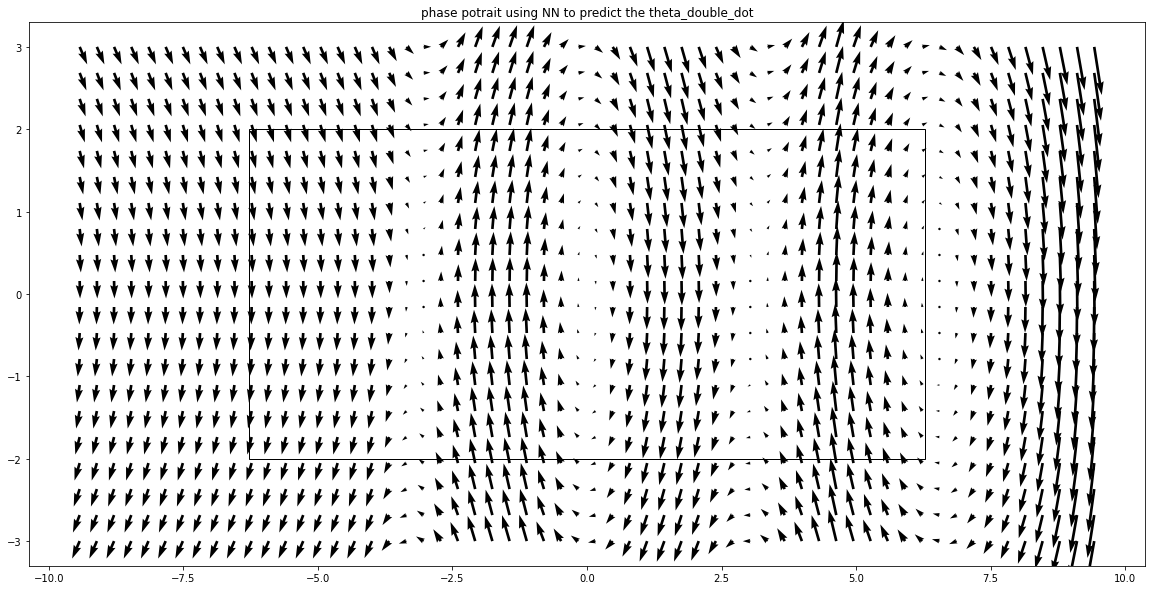

In [79]:
import matplotlib
g_range = 3
theta_list = np.linspace(-g_range*np.pi,g_range*np.pi,60)
theta_dot_list = np.linspace(-g_range, g_range, 20)  

thetas = []
theta_dots = []
theta_double_dots = []
for theta in theta_list:
    for theta_dot in theta_dot_list:
        X = [[theta, theta_dot]]
        # using the clf to predict the theta_double_dot
        theta_double_dot = best_clf.predict(X)
        thetas.append(theta)
        theta_dots.append(theta_dot)
        theta_double_dots.append(theta_double_dot)
fig, ax = plt.subplots(figsize = (20,10))
p = Rectangle((-2*np.pi, -2), 4*np.pi, 4, fill=False)
ax.add_patch(p)
q = ax.quiver(thetas, theta_dots, theta_dots, theta_double_dots)
plt.title('phase potrait using NN to predict the theta_double_dot')
plt.show()

As I trained the NN with theta(-2pi to 2pi) and theta_dot(-2 to 2), the NN did a good job in the **rectangle area** where it has been trained, but outside the the training area, the phase potrait is not correct.

# Controls
from lab one you'll need a couple of things. Namly the motor class and get_theta_double_dot_with_a.

In [33]:
mu = 0.3
g = 9.8
L = 1

def get_theta_double_dot_with_a(theta, theta_dot, a_motor):
    return -mu*theta_dot - g/L*math.sin(theta) - a_motor * math.cos(theta)

In [34]:
class Motor_Acc: # direction, speed, duration
    def __init__(self, direction, speed, duration):
        self.direction = direction
        self.speed = speed
        self.topSpeed = 20 # top speed is 20m/s
        self.topAcc = 50 # top acc is 50m/s^2
        self.duration = duration
        self.max_duration = 4
        self.time = 0
        self.func = self.create_func()
    
    def create_func(self):
        func_list = []

        # create a list of acc, which is a sine wave
        if self.direction == 1: # right
            for time_step in range(1, self.duration+1):
                acc = np.sin(2*np.pi/self.duration * time_step) * self.speed
                if acc > self.topAcc:
                    acc = self.topAcc
                func_list.append(acc) 

            
        
        elif self.direction == -1: # left
            for time_step in range(1, self.duration+1):
                acc = -1 * np.sin(2*np.pi/self.duration * time_step) * self.speed
                if acc < (-1 * self.topAcc):
                    acc = self.topAcc
                func_list.append(acc) 
            
        
        ''' Create a list of acceleration values so that every step correspons to a step in simulation.
        Use the direction, speed and duration to create this list.
        In a next Lab we will use the data of the prototype to fit a function. 
        If you want to create a function now, that is fine.
        '''
        return func_list #or some function
        
    def tik(self):
        '''
        return the acceleration at a given time and shift the time
        '''
        self.time = self.time + 1
        if self.time < self.duration:
            return self.func[self.time]
        else:
            return 0. #return an acceleration of 0
    
    def set_motor(self, direction, speed, duration):
        self.direction = direction
        self.speed = speed
        self.duration = duration
        self.time = 0
        self.func = self.create_func()

In [38]:
def state_with_motor(t):
    
    theta = THETA_0
    theta_dot = THETA_DOT_0
    delta_t = 0.01
    theta_sum = []
    theta_dot_sum = []
    
    distance_sum = []
    for time in np.arange(0,t,delta_t):
        '''
        Now the motor is running from the strat of the simulation. 
        Eventually we want to strat the motor according to how we want to control it (next lab). 
        Now create 2 list to keep track of theta and theta_dot to visualize the progress.
        '''
        #Create lists
        
        a_of_motor = motor.tik()
        
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, a_of_motor)
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
        # add the distance of cart here
        distance = distance + a_of_motor * delta_t
        distance_sum.append(distance)
        # append theta and theta_dot to lists
        theta_sum.append(theta)
        theta_dot_sum.append(theta_dot)
    #return the lists
    return theta_sum, theta_dot_sum, distance_sum

**Question [5 points]:** Add multiple configurations to estimate the best first motor action to choose.   
Do this by simulating and saving the final angle and angular speed.  
The largest angular speed will give you the best move.  
However due to constrains in the real world, you now need to also keep track of the pivot location.

In [39]:
direction_list = [1] *10
speed_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
duration_list = [5] * 10
res = []
for n in range(len(direction_list)):
    motor = Motor_Acc(direction_list[n], speed_list[n], duration_list[n])
    res.append(motor.tik())
print(res)

[1.1755705045849465, 2.351141009169893, 4.702282018339786, 9.404564036679572, 18.809128073359144, 37.61825614671829, 50, 50, 50, 50]


##### If we give the motor a large speed and short duration, the angular speed will be largest.

**Question [5 points]:** Evaluate what the new location of the pivot point will be.   
You can calculate with the use of the acceleration profile of the motor control.    
Is this acceptable? If not find an acceptable move.

In [63]:
# create a motor
t = 10
THETA_0 = 0
THETA_DOT_0 = 0
distance = 0
motor = Motor_Acc(1, 20, 100)
theta_sum, theta_dot_sum, distance_sum = state_with_motor(t)
print(max(distance_sum))
print(min(distance_sum))

6.3515450868489305
-0.012558103905863571


The cart(pivot location) will move back and force, the and distance is in a range of 6.35 units from its starting point. The pendulum has a length of 1 unit. So the distance will be around 6.35 times of the length of pendulum.

**Question [5 points]:** Now save the new theta and theta_dot that are the best motor action and start the same process again.  
repeat until the theta is close to pi (+-3).

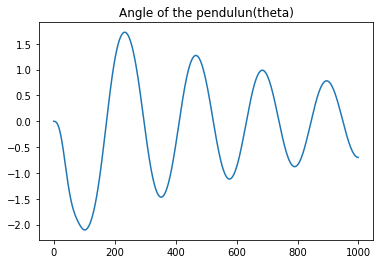

In [66]:
plt.plot(range(len(theta_sum)), theta_sum)
plt.title('Angle of the pendulun(theta)')
plt.show()

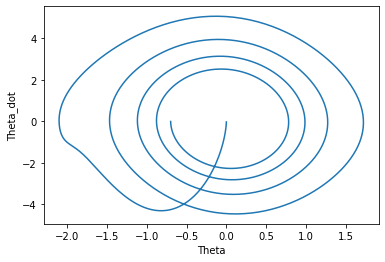

In [68]:
plt.plot(theta_sum, theta_dot_sum)
plt.xlabel('Theta')
plt.ylabel('Theta_dot')
plt.show()

The phase potrait shows that: start at 0,0, (theta, theta_dot) will travel to (-2.0, 0) and converge to (0,0) eventually. It will not go to (n * pi, 0) where n=0,1,2,3....
So we need a control system to do the swing up and balancing.

Now for the upward balance we will do with PID control.  
This video might help you to understand PID: https://www.youtube.com/watch?v=UR0hOmjaHp0  
Now the problem of control is a continues one so we can ignore using the motor class for now.

In [120]:
def pid_control(t, THETA_0,THETA_DOT_0, a, goal):
    theta = THETA_0
    theta_dot = THETA_DOT_0
    list_t = []
    list_e = []
    list_a = []
    delta_t = 0.01#choose a delta in time to compute
    error, previous_error, error_sum = 0, 0, 0

    for time in np.arange(0,t,delta_t):
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, a)
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
        
        previous_error = error
        error = goal - theta
        error_sum = error_sum + (error*delta_t)
        
        if len(list_t)>0:
            # We need at least one step in simulation to be able to make use of an Integral or derivative component.
            a = p*error + i*(error_sum) + d*(error-previous_error)
        else:
            # the first step can only be a Proportional change
            a = p*error
        list_t.append(theta)
        list_e.append(error)
        list_a.append(a)
#         print(a)
    return list_t, list_e, list_a

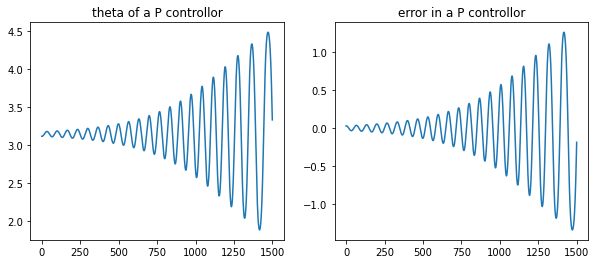

In [121]:
p, i, d = 100, 0, 0
THETA_0, THETA_DOT_0 = 0, 0
a = 0
simulation_time = 15
theta_list, error_list, a_list= pid_control(simulation_time, np.pi-0.03, -0.01, a, np.pi)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(theta_list)), theta_list)
plt.title('theta of a P controllor')
plt.subplot(1, 2, 2)
plt.plot(range(len(error_list)), error_list)
plt.title('error in a P controllor')
plt.show()

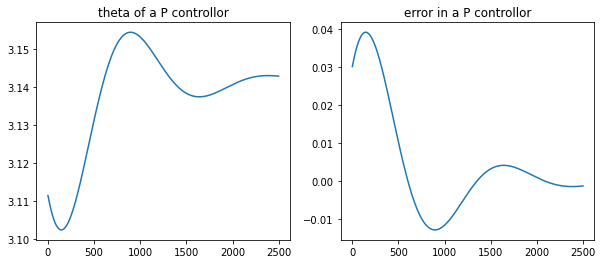

In [122]:
p, i, d = 10, 0, 0
THETA_0, THETA_DOT_0 = 0, 0
a = 0
simulation_time = 25
theta_list, error_list, a_list= pid_control(simulation_time, np.pi-0.03, -0.01, a, np.pi)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(theta_list)), theta_list)
plt.title('theta of a P controllor')
plt.subplot(1, 2, 2)
plt.plot(range(len(error_list)), error_list)
plt.title('error in a P controllor')
plt.show()

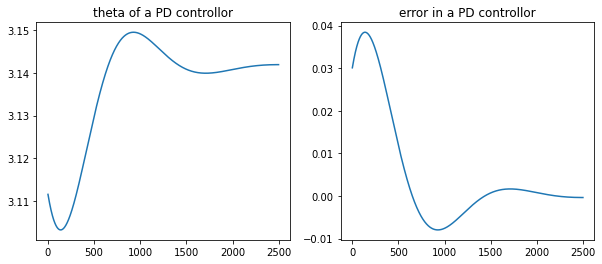

In [123]:
#lest say we start with an acceleration of 0
# for now we manipulate a directly to get an idea of how we should control things.
p, i, d = 10, 0, 10
THETA_0, THETA_DOT_0 = 0, 0
a = 0
simulation_time = 25
# we now simulate what happens over time with theta and the error. 
# The error is the difference between the goal of pi radius and the actual theta. 
theta_list, error_list, a_list= pid_control(simulation_time, np.pi-0.03, -0.01, a, np.pi)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(theta_list)), theta_list)
plt.title('theta of a PD controllor')
plt.subplot(1, 2, 2)
plt.plot(range(len(error_list)), error_list)
plt.title('error in a PD controllor')
plt.show()

As can be seen, P controller can overshoot when we have a large p value, and using a PD controller we can see in the error plot we have smaller overshoot comparing to a P controller with same P value.

**Question [5 points]:** What type of controller do we need P? PD? PI? or PID? explain why.

The problem of P controller is it might overshoot in some cases. We can solve the problem by using a PD controller. A P controller is using the error as its input to control, its goal is to get the error to zero as soon as possiable. By add D controller we add constrain to it, and a PD controller will limit the speed of control system to reach min error.

Now the goal of a PID is to stabilize a system, hopefully as quick as possible.  
**Question [5 points]:** Implement the controller, explore different settings.  
Find the settings so that the model can be controlled in the range of pi-0.1 until pi+0.1

In [129]:
p_list = [0.1, 1, 10, 15, 20, 30, 50]
i_list = [0, 0.1, 1, 10, 15, 20, 30, 50]
d_list = [0, 0.1, 1, 10, 50, 100, 500, 1000]
best_error_so_far = 10 # random choice 
for p in p_list:
    for i in i_list:
        for d in d_list:
            theta_list, error_list, a_list= pid_control(simulation_time, np.pi-0.03, -0.01, a, np.pi)
            error_array = np.asarray(error_list)
            error_abs = np.absolute(error_array)
            largest_abs_error = np.max(error_abs)
            if largest_abs_error < 0.1 and largest_abs_error < best_error_so_far:
                best_error_so_far = largest_abs_error
                best_pid = (p, i, d)


In [133]:
print('Best controller has P,I,D of:', best_pid)

Best controller has P,I,D of: (50, 0, 50)


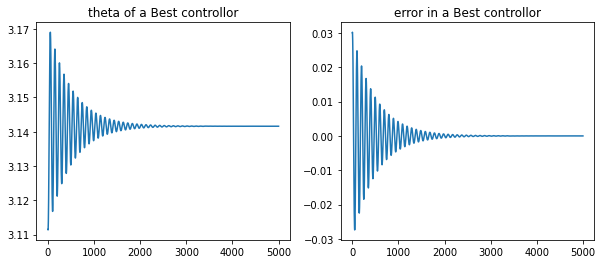

In [136]:
p, i, d = 50, 0, 50

THETA_0, THETA_DOT_0 = 0, 0
a = 0
simulation_time = 50
# we now simulate what happens over time with theta and the error. 
# The error is the difference between the goal of pi radius and the actual theta. 
theta_list, error_list, a_list= pid_control(simulation_time, np.pi-0.03, -0.01, a, np.pi)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(theta_list)), theta_list)
plt.title('theta of a Best controllor')
plt.subplot(1, 2, 2)
plt.plot(range(len(error_list)), error_list)
plt.title('error in a Best controllor')
plt.show()

Using the chosen best PID (p=50, I=0, D=50) controller (PD controller in fact), we can see the error never exceed 0.03.

**Question [5 points]:** Now also return the list of a values in the function pid_control and calculate and plot the pivot location over time. Is this acceptable or is it necessary to change the controls because the deflections are to large?

To calculate the location, we need the speed, and we can use acc and delta_t to calculate the speed.

In [151]:
# add Location of the pivot
def pid_control_dis_returned(t, THETA_0,THETA_DOT_0, a, goal):
    theta = THETA_0
    theta_dot = THETA_DOT_0
    list_t = []
    list_e = []
    list_a = []
    delta_t = 0.01#choose a delta in time to compute
    error, previous_error, error_sum = 0, 0, 0
    v, dis = 0, 0
    list_dis = []

    for time in np.arange(0,t,delta_t):
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, a)
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
        
        previous_error = error
        error = goal - theta
        error_sum = error_sum + (error*delta_t)
        
        if len(list_t)>0:
            # We need at least one step in simulation to be able to make use of an Integral or derivative component.
            a = p*error + i*(error_sum) + d*(error-previous_error)
        else:
            # the first step can only be a Proportional change
            a = p*error
            
        # use a to calculate the velocity
        v = v + a*delta_t
        dis = dis + v*delta_t
        list_t.append(theta)
        list_e.append(error)
        list_a.append(a)
        list_dis.append(dis)
#         print(a)
    return list_t, list_e, list_a, list_dis

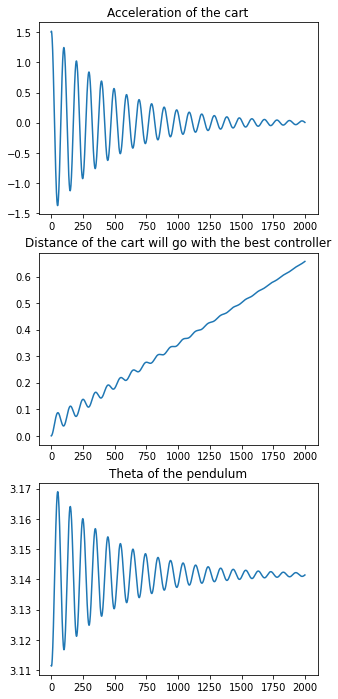

In [155]:
p, i, d = 50, 0, 50

THETA_0, THETA_DOT_0 = 0, 0
a = 0
simulation_time = 20
# we now simulate what happens over time with theta and the error. 
# The error is the difference between the goal of pi radius and the actual theta. 
theta_list, error_list, a_list, dis_list = pid_control_dis_returned(simulation_time, np.pi-0.03, -0.01, a, np.pi)
plt.figure(figsize=(5, 12))
plt.subplot(3, 1, 1)
plt.plot(range(len(a_list)), a_list)
plt.title('Acceleration of the cart')

plt.subplot(3, 1, 2)
plt.plot(range(len(dis_list)), dis_list)
plt.title('Distance of the cart will go with the best controller')

plt.subplot(3, 1, 3)
plt.title('Theta of the pendulum')
plt.plot(range(len(theta_list)), theta_list)
plt.show()

As can be seen in the plot, the cart will move left and right to banlance the pendulum, and as the pendulum became stable, the cart will remain moving to one direction to maintain the balance.
So, yes, we need to change the control, maybe break the balance when the cart is close to the boundray, and let the control system to rebuild the banlance. Or maybe we can build a digital twin of the model and use reinforcement learning (Q-learning, DQN) to train the model, and use the trained model to control the real system.